# Caffeine Effects
Caffeine increase RyR opening sensitivity to luminal and subspace calcium
In this model, we decrease the mid saturation sub-SR calcium concentration for the opening rate

In [1]:
using ModelingToolkit
using OrdinaryDiffEq
using DiffEqCallbacks
using Plots
using CaMKIIModel
using CaMKIIModel: second, metre, Farad
Plots.default(lw=1.5)

In [2]:
sys = build_neonatal_ecc_sys(simplify=true, reduce_iso=true, reduce_camk=true)
tend = 500.0second
prob = ODEProblem(sys, [], tend)
stimstart = 100.0second
stimend = 300.0second
alg = TRBDF2()
function add_coffee_affect!(integrator)
    integrator.ps[sys.RyRsensitivity] = 10
end

@unpack Istim = sys
callback = build_stim_callbacks(Istim, stimend; period=1second, starttime=stimstart)

SciMLBase.CallbackSet{Tuple{}, Tuple{SciMLBase.DiscreteCallback{DiffEqCallbacks.var"#115#117"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}, CaMKIIModel.var"#13#15"{Float64, Int64, Symbolics.Num}, DiffEqCallbacks.var"#116#118"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, CaMKIIModel.var"#13#15"{Float64, Int64, Symbolics.Num}}, typeof(SciMLBase.FINALIZE_DEFAULT), Nothing}, SciMLBase.DiscreteCallback{DiffEqCallbacks.var"#115#117"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}, CaMKIIModel.var"#14#16"{Float64, Int64, Symbolics.Num}, DiffEqCallbacks.var"#116#118"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, CaMKIIModel.var"#14#16"{Float64, Int64, Symbolics.Num}}, typeof(SciMLBase.FINALIZE_DEFAULT), Nothing}}}((), (SciMLBase.Discr

Add caffeine at t = 200 econd

In [3]:
callback_caf = CallbackSet(build_stim_callbacks(Istim, stimend; period=1second, starttime=stimstart), PresetTimeCallback(200.0second, add_coffee_affect!))

SciMLBase.CallbackSet{Tuple{}, Tuple{SciMLBase.DiscreteCallback{DiffEqCallbacks.var"#115#117"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}, CaMKIIModel.var"#13#15"{Float64, Int64, Symbolics.Num}, DiffEqCallbacks.var"#116#118"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, CaMKIIModel.var"#13#15"{Float64, Int64, Symbolics.Num}}, typeof(SciMLBase.FINALIZE_DEFAULT), Nothing}, SciMLBase.DiscreteCallback{DiffEqCallbacks.var"#115#117"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}, CaMKIIModel.var"#14#16"{Float64, Int64, Symbolics.Num}, DiffEqCallbacks.var"#116#118"{typeof(SciMLBase.INITIALIZE_DEFAULT), Bool, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, CaMKIIModel.var"#14#16"{Float64, Int64, Symbolics.Num}}, typeof(SciMLBase.FINALIZE_DEFAULT), Nothing}, SciMLBase.DiscreteCal

In [4]:
@time sol = solve(prob, alg; callback)
@time sol_caf = solve(prob, alg; callback=callback_caf)

 10.049190 seconds (21.47 M allocations: 1.005 GiB, 4.10% gc time, 74.06% compilation time)
  4.783404 seconds (3.98 M allocations: 245.006 MiB, 1.44% gc time, 42.99% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 22255-element Vector{Float64}:
      0.0
      0.00037376965588217846
      0.004111466214703963
      0.03981907054375368
      0.06090491262855715
      0.1655435225566852
      0.2409336011179059
      0.5227875405036884
      1.0858597487365014
      2.388889121726196
      ⋮
 486612.6617039646
 488740.25414558785
 490410.81760149135
 492522.9781453525
 494113.7000322476
 496241.0658518241
 497855.4062649577
 499776.4840116451
 500000.0
u: 22255-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.0025999722040421203, 829.9999902796054, 829.9999993331091, 0.007020004989170199, 0.9660000353355825, 0.22156007721482085, 0.09242995488968388, 0.0018799969383422777, 0.009769997724445615, 0.2608099143344817  …  0.12113, 0.12113, 0.12113, 0.12113, 0.121130000000

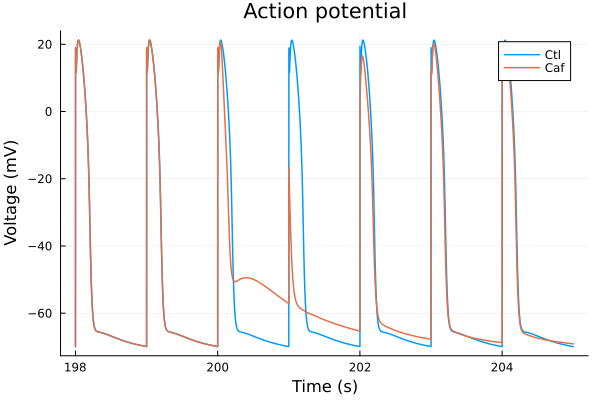

In [5]:
i = (sys.t/1000, sys.vm)
plot(sol, idxs=i, title="Action potential", lab="Ctl", tspan=(198second, 205second))
plot!(sol_caf, idxs=i, lab="Caf", tspan=(198second, 205second), ylabel="Voltage (mV)", xlabel="Time (s)")

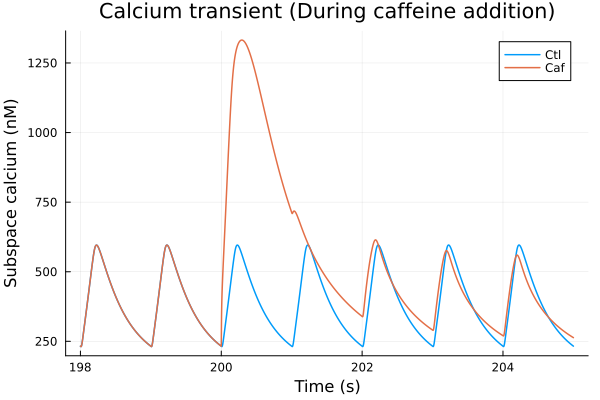

In [6]:
i = (sys.t/1000, sys.Cai_sub_SR * 1000)
plot(sol, idxs=i, title="Calcium transient (During caffeine addition)", lab="Ctl", tspan=(198second, 205second))
plot!(sol_caf, idxs=i, tspan=(198second, 205second), lab="Caf", ylabel="Subspace calcium (nM)", xlabel="Time (s)")

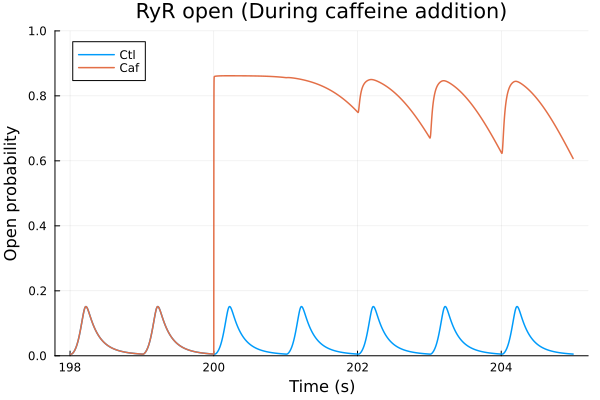

In [7]:
i = (sys.t/1000, sys.PO1RyR)
plot(sol, idxs=i, title="RyR open (During caffeine addition)", lab="Ctl", tspan=(198second, 205second))
plot!(sol_caf, idxs=i, tspan=(198second, 205second), lab="Caf", ylabel="Open probability", ylims=(0, 1), xlabel="Time (s)")

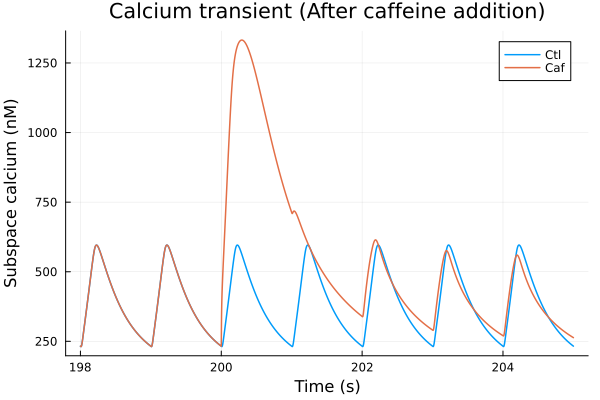

In [8]:
i = (sys.t/1000, sys.Cai_sub_SR * 1000)
plot(sol, idxs=i, title="Calcium transient (After caffeine addition)", lab="Ctl", ylabel="Subspace calcium (nM)", tspan=(198second, 205second))
plot!(sol_caf, idxs=i, lab="Caf", xlabel="Time (s)", tspan=(198second, 205second))

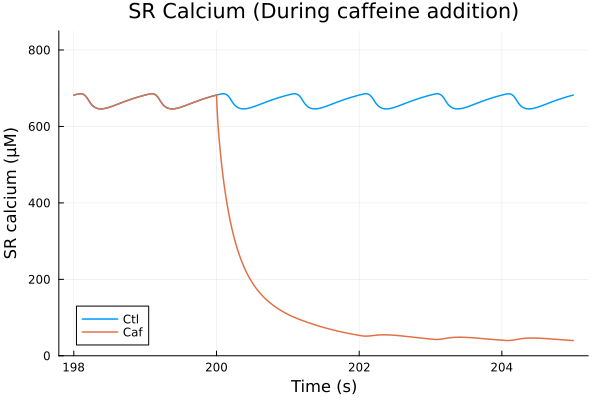

In [9]:
i = (sys.t/1000, sys.CaJSR)
plot(sol, idxs=i, title="SR Calcium (During caffeine addition)", lab="Ctl", ylabel="SR calcium (μM)", tspan=(198second, 205second))
plot!(sol_caf, idxs=i, tspan=(198second, 205second), lab="Caf", ylims=(0, 850), xlabel="Time (s)")

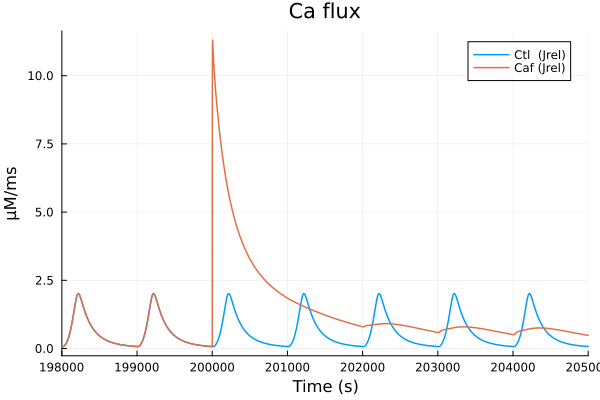

In [10]:
i = (sys.t/1000, sys.Jrel)
plot(sol, idxs=sys.Jrel, title="Ca flux", lab="Ctl  (Jrel)", tspan=(198second, 205second))
plot!(sol_caf, idxs=sys.Jrel, lab="Caf (Jrel)", tspan=(198second, 205second), ylabel="μM/ms", xlabel="Time (s)")

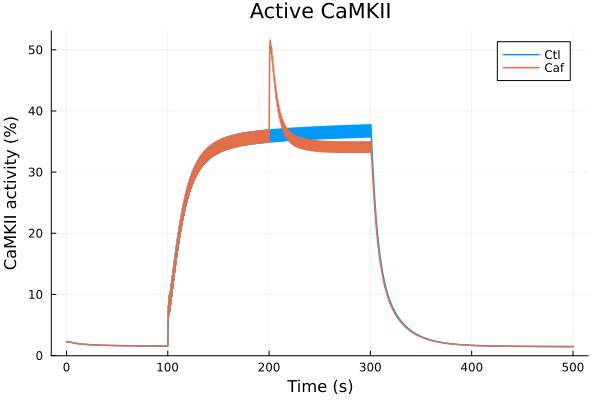

In [11]:
i = (sys.t/1000, sys.CaMKAct*100)
plot(sol, idxs=i, title="Active CaMKII", lab="Ctl")
plot!(sol_caf, idxs=i, lab="Caf", ylabel="CaMKII activity (%)", xlabel="Time (s)")

Add caffeine in the beginning of the simulation
Add caffeine and nifedipine in the beginning of the simulation (nifedipine blocks 90% of L-type calcium channel)

In [12]:
prob = ODEProblem(sys, [], tend)
prob_caf = ODEProblem(sys, [sys.RyRsensitivity => 10], tend)
prob_nif_caf = ODEProblem(sys, [sys.RyRsensitivity => 10, sys.GCaL => 6.3e-6 * (metre^3 / second / Farad)], tend)
@time sol = solve(prob, alg; callback)
@time sol_caf = solve(prob_caf, alg; callback)
@time sol_nif_caf = solve(prob_nif_caf, alg; callback)

  2.583087 seconds (181.24 k allocations: 45.042 MiB)
  2.792333 seconds (180.24 k allocations: 44.797 MiB, 1.78% gc time)
  1.963091 seconds (131.62 k allocations: 32.928 MiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 16155-element Vector{Float64}:
      0.0
      0.00036475171141220293
      0.0040122688255342315
      0.04002730220813219
      0.06107844755187036
      0.1668983916346115
      0.24249368910866453
      0.5251299051276579
      0.9022279165786617
      1.4954385373044485
      ⋮
 436720.0038013915
 445297.82828101015
 451990.2195297975
 461048.46857879194
 468119.9009713256
 477565.21371905616
 484800.21770803235
 494503.53485934966
 500000.0
u: 16155-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.002881414080688233, 829.9999900007011, 829.9999993491982, 0.007020004868481778, 0.9660000344830407, 0.22156007535185795, 0.09242995597806056, 0.0018799970119809143, 0.009769997779353121, 0.2608099164014243  …  0.12113, 0.12113, 0.12113, 0.12113, 0.1211300

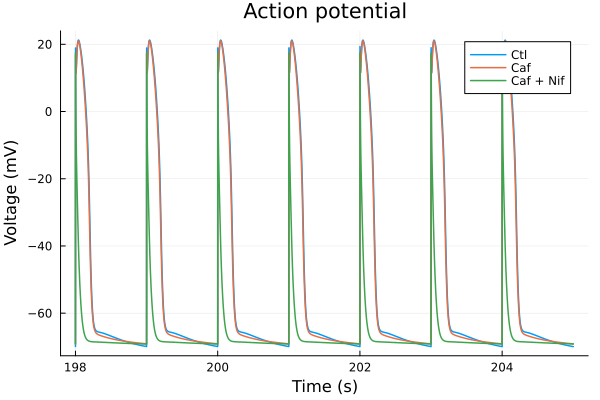

In [13]:
i = (sys.t/1000, sys.vm)
tspan = (198second, 205second)
plot(sol, idxs=i, title="Action potential", lab="Ctl"; tspan)
plot!(sol_caf, idxs=i, lab="Caf"; tspan)
plot!(sol_nif_caf, idxs=i, lab="Caf + Nif", tspan=tspan, ylabel="Voltage (mV)", xlabel="Time (s)")

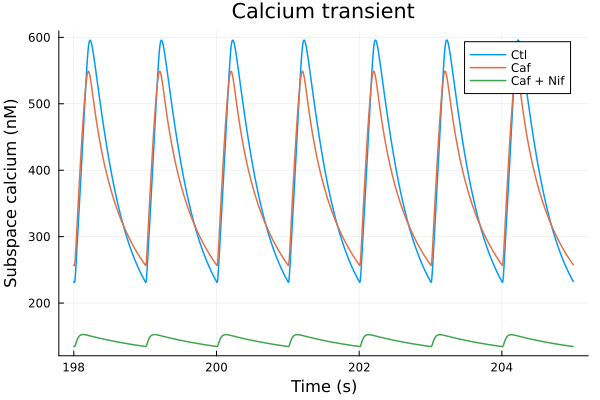

In [14]:
i = (sys.t/1000, sys.Cai_sub_SR * 1000)
tspan=(198second, 205second)
plot(sol, idxs=i, title="Calcium transient", lab="Ctl";tspan)
plot!(sol_caf, idxs=i, lab="Caf", ylabel="Subspace calcium (nM)";tspan)
plot!(sol_nif_caf, idxs=i, lab="Caf + Nif", ylabel="Subspace calcium (nM)", xlabel="Time (s)";tspan)

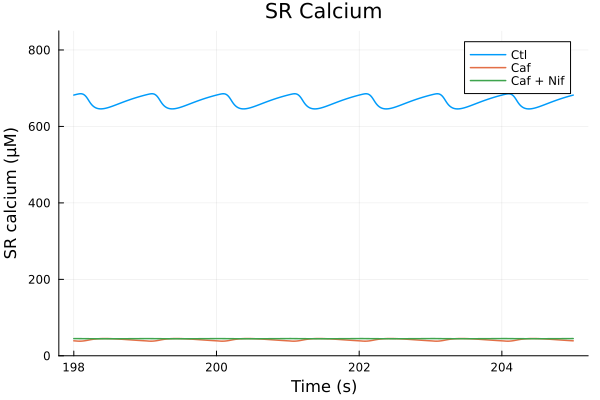

In [15]:
i = (sys.t/1000, sys.CaJSR)
tspan=(198second, 205second)
plot(sol, idxs=i, title="SR Calcium", lab="Ctl", ylabel="SR calcium (μM)"; tspan)
plot!(sol_caf, idxs=i, lab="Caf"; tspan)
plot!(sol_nif_caf, idxs=i, lab="Caf + Nif", ylims=(0, 850), xlabel="Time (s)"; tspan)

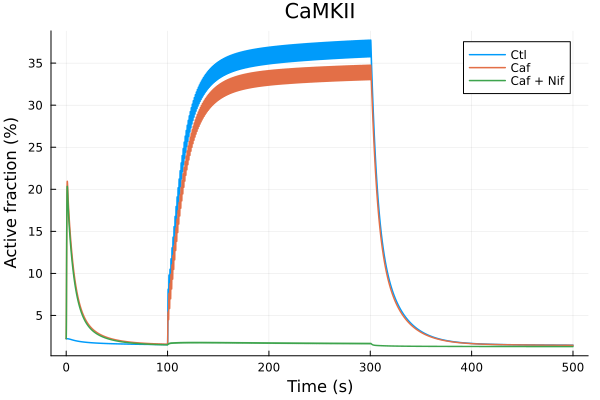

In [16]:
i = (sys.t/1000, sys.CaMKAct*100)
plot(sol, idxs=i, title="CaMKII", lab="Ctl")
plot!(sol_caf, idxs=i, lab="Caf")
plot!(sol_nif_caf, idxs=i, lab="Caf + Nif", ylabel="Active fraction (%)", xlabel="Time (s)")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*